# Data Wrangling Project 
#                                                                                             - Jasthi Naveen
 
 
## Introduction
- Data wrangling, which consists of:
     - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
     - Assessing data
     - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


In [162]:
#first import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import requests
import tweepy
import json
import re
import os

## Gathering Data

In [163]:
# Reading the csv file
twitterArchive  = pd.read_csv('twitter-archive-enhanced.csv')

In [164]:
#check the file with .head()
twitterArchive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Loading image predictions file

In [165]:
#Downloading URL programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Reading TSV file
image_prediction_df = pd.read_csv('image-predictions.tsv', sep='\t' )

##  Twitter API from Json

In [166]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [167]:

#creating dataframe with tweet_id, retweet_count and facorite_count.
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        df_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### we have datasets ready and lets see what it has inside

# Assessing Data

###  TwitterArchive_df

In [168]:
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [169]:
twitterArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [170]:
twitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [171]:
# Duplicated IDs in twitterArchive
sum(twitterArchive["tweet_id"].duplicated())


0

In [172]:
sum(twitterArchive["text"].duplicated())

0

In [173]:
# most rating in twitterArchive
twitterArchive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [174]:
twitterArchive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [175]:
twitterArchive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Jett         1
Benny        1
life         1
Obie         1
Marlee       1
Name: name, Length: 957, dtype: int64

# Image_predictions_df

In [176]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [177]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [178]:
#check if we have duplicated IDs in image_predictions_df
sum(image_prediction_df["tweet_id"].duplicated())

0

In [179]:
# duplicated url
sum(image_prediction_df["jpg_url"].duplicated())

66

In [180]:
image_prediction_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [181]:
image_prediction_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pole                    1
radio_telescope         1
ibex                    1
minibus                 1
starfish                1
Name: p1, Length: 378, dtype: int64

In [182]:
image_prediction_df['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [183]:
image_prediction_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [184]:
image_prediction_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
wallaby                 1
pier                    1
jigsaw_puzzle           1
lesser_panda            1
medicine_chest          1
Name: p2, Length: 405, dtype: int64

In [185]:
image_prediction_df['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [186]:
image_prediction_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [187]:
image_prediction_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
orangutan              1
go-kart                1
barbell                1
bow_tie                1
traffic_light          1
Name: p3, Length: 408, dtype: int64

In [188]:
image_prediction_df['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [189]:
image_prediction_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

## json file

In [190]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [191]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [192]:
#check if we have duplicated IDs in tweet_df
sum(tweet_df["tweet_id"].duplicated())

0

In [193]:
tweet_df['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [194]:
tweet_df['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

##### After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.

### we have looked inside the dataframes but we have to clean the dataframes  so that they will be fit for analysis
### first we will deal with the tidiness and then clean one by one issues

In [195]:
#first we need to make copy of every dataframe
df1 = twitterArchive.copy()
df2 = image_prediction_df.copy()
df3 = tweet_df.copy()

## Tidiness Issues

## 1)  
## Define



##### COMBINING DATASETS

## Code

In [196]:
df_merge = pd.merge(df1, df2, on=['tweet_id'], how='inner')
df_merge = pd.merge(df_merge, df3, on = 'tweet_id', how = 'inner' )

## Test

In [197]:

df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

## 2)
## Define
##### Merging the coulmns puppo , pupper, floofer and doggo 
## Code


In [198]:
df_merge.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1753
1,None,None,None,puppo,23
2,None,None,pupper,None,210
3,None,floofer,None,None,7
4,doggo,None,None,None,67
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [199]:
#Some dogs has multiple stages, will concatenate them.

df_merge.loc[df_merge.doggo == 'None', 'doggo'] = ''
df_merge.loc[df_merge.floofer == 'None', 'floofer'] = ''
df_merge.loc[df_merge.pupper == 'None', 'pupper'] = ''
df_merge.loc[df_merge.puppo == 'None', 'puppo'] = ''

df_merge.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1753
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [200]:
df_merge['Stage'] = (df_merge.doggo + df_merge.floofer 
                                 + df_merge.pupper + df_merge.puppo)
df_merge.loc[df_merge.Stage == 'doggopupper', 'Stage'] = 'doggo,pupper'
df_merge.loc[df_merge.Stage == 'doggopuppo', 'Stage'] = 'doggo,puppo'
df_merge.loc[df_merge.Stage == 'doggofloofer', 'Stage'] = 'doggo,floofer'

df_merge.loc[df_merge.Stage == '', 'Stage'] = 'None'

## Test

In [201]:
df_merge.Stage.value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: Stage, dtype: int64

# Quality Issues

## 1) 
## Define
##### Tweet_id is integer instead of object.
## Code

In [202]:
#change the type from int to object
df_merge['tweet_id'] = df_merge['tweet_id'].apply(str)


## Test

In [203]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

## 2)
## Define
##### Converte timestamp to date type
##  Code

In [204]:
# changing the type from object to date
df_merge['timestamp'] = pd.to_datetime(df1['timestamp'])


## Test

In [205]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

## 3)
## Define

##### Time and date are in one column (timestamp) in twitter archive.
## Code

In [206]:
#now seprate date and time
df_merge['date'] =df_merge['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['timestamp'].apply(lambda time: time.strftime('%H:%M'))
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['time'] = pd.to_datetime(df_merge['time'])


## Test

In [207]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8853,39467,None,2017-08-01,2021-04-04 16:23:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6514,33819,None,2017-08-01,2021-04-04 00:17:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4328,25461,None,2017-07-31,2021-04-04 00:18:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8964,42908,None,2017-07-30,2021-04-04 15:58:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None,2017-07-29,2021-04-04 16:00:00


In [208]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

## 4)
## Define
##### As per project specification, we only want original dog ratings, retweets are not of interest in this data.
## Code

In [209]:
df_merge = df_merge[df_merge.retweeted_status_id.isnull()]
df_merge= df_merge[df_merge.retweeted_status_user_id.isnull()]
df_merge = df_merge[df_merge.retweeted_status_timestamp.isnull()]

In [210]:
#drop columns
df_merge = df_merge.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

## Test

In [211]:

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

In [212]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.085851,False,banana,0.076110,False,8853,39467,None,2017-08-01,2021-04-04 16:23:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,6514,33819,None,2017-08-01,2021-04-04 00:17:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,4328,25461,None,2017-07-31,2021-04-04 00:18:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.168086,True,spatula,0.040836,False,8964,42908,None,2017-07-30,2021-04-04 15:58:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None,2017-07-29,2021-04-04 16:00:00


## 5)
## Define
##### source column is not readable
## Code


In [213]:
df_merge['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [214]:
df_merge['source'] = df_merge['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test

In [215]:
df_merge['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## 6)
## Define
##### Remove the duplicated rows from jpg_url column
## Code

In [216]:
#check the duplicated before
sum(df_merge['jpg_url'].duplicated())

0

In [217]:
#drop the duplicated
df_merge = df_merge.drop_duplicates(subset=['jpg_url'], keep='last')

## Test

In [218]:
sum(df_merge['jpg_url'].duplicated())

0

## 7)
## define
##### the coulmn 'name' have NAN values that assigned as None.
## Code

In [219]:
df_merge['name'].value_counts()

None       546
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Chesney      1
Poppy        1
Tiger        1
Tilly        1
Marlee       1
Name: name, Length: 936, dtype: int64

In [220]:
# Making all None String nulls
df_merge['name'].replace('None', np.nan, inplace = True)

## Test

In [221]:
df_merge['name'].value_counts()

a          55
Charlie    11
Oliver     10
Lucy       10
Cooper     10
           ..
Chesney     1
Poppy       1
Tiger       1
Tilly       1
Marlee      1
Name: name, Length: 935, dtype: int64

## 8)

## define

#####  Drop the columns that won't be used for analysis(in_raply_to_status_id, in_reply_to_user_id).

## Code

In [222]:
df_merge=df_merge.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

## Test

In [223]:

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1448 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  jpg_url             1994 non-null 

# Storing Data

In [224]:
# Save the clean data as new csv file
wrangled_df.to_csv('twitter_archive_master.csv')

In [225]:
# Read it in new variable to analyze it
wrangled_df = pd.read_csv('twitter_archive_master.csv')

In [226]:
wrangled_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Stage,date,time
0,0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.085851,False,banana,0.076110,False,8853,39467,None,2017-08-01 00:00:00,2021-04-04 16:23:00
1,1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,6514,33819,None,2017-08-01 00:00:00,2021-04-04 00:17:00
2,2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,4328,25461,None,2017-07-31 00:00:00,2021-04-04 00:18:00
3,3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.168086,True,spatula,0.040836,False,8964,42908,None,2017-07-30 00:00:00,2021-04-04 15:58:00
4,4,4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None,2017-07-29 00:00:00,2021-04-04 16:00:00


In [227]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['time'] = pd.to_datetime(df_merge['time'])

In [228]:
wrangled_df.describe()

,Unnamed: 0,Unnamed: 0.1,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,996.500000,1057.814945,7.358508e+17,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,575.762538,596.849396,6.747816e+16,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,0.000000,0.000000,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,498.250000,553.250000,6.758475e+17,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,996.500000,1073.500000,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,1494.750000,1571.750000,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,1993.000000,2072.000000,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [229]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1994 non-null   int64  
 1   Unnamed: 0.1        1994 non-null   int64  
 2   tweet_id            1994 non-null   int64  
 3   timestamp           1994 non-null   object 
 4   source              1994 non-null   object 
 5   text                1994 non-null   object 
 6   expanded_urls       1994 non-null   object 
 7   rating_numerator    1994 non-null   int64  
 8   rating_denominator  1994 non-null   int64  
 9   name                1448 non-null   object 
 10  doggo               74 non-null     object 
 11  floofer             8 non-null      object 
 12  pupper              212 non-null    object 
 13  puppo               23 non-null     object 
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   int64  
 16  p1    

# Analyzing, and Visualizing Data

In [230]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### The total number of tweets over time 

In [231]:
wrangled_df.timestamp = pd.to_datetime(wrangled_df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = wrangled_df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1994
dtype: int64

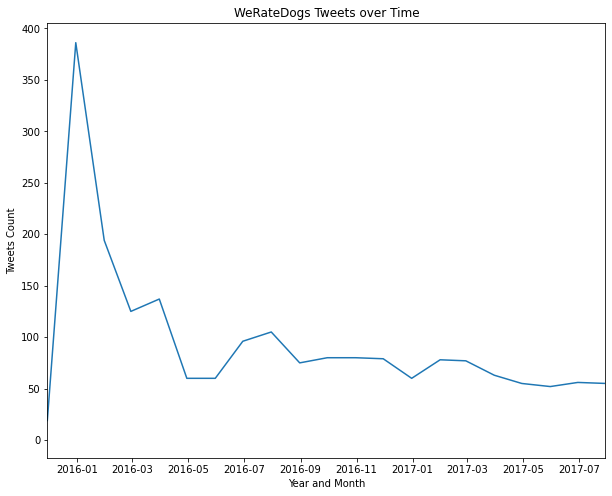

In [232]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

#### it was active at early and later towards downtrend with little ups and downs 

#### Visualizing the retweet counts, and favorite counts comparison over time

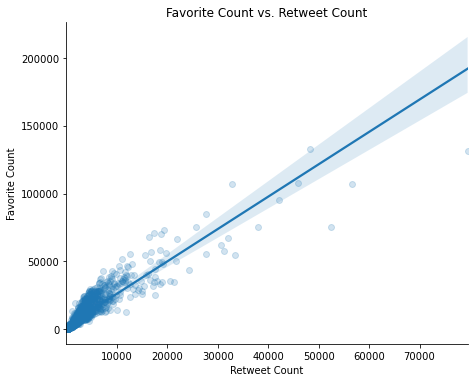

In [233]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=wrangled_df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');


####  The Favorite counts are correlated with retweet counts - this is a positive correlation.

#### Visualizing  the most used source

In [234]:
wrangled_df['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

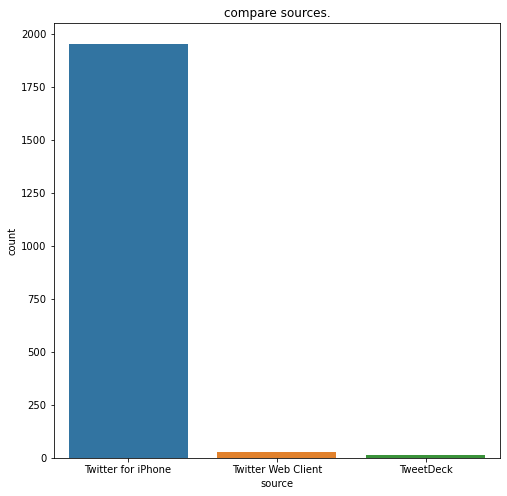

In [235]:
plt.figure(figsize = (8, 8))
sb.countplot(data =wrangled_df, x = 'source')
plt.title('compare sources.')
plt.savefig('most_used_source.png', bbox_inches='tight');

##### iphone stand first and the is huge difference to compare between them ,a very little tweets other than iphone

## Did the number of Favorite incressed over time?

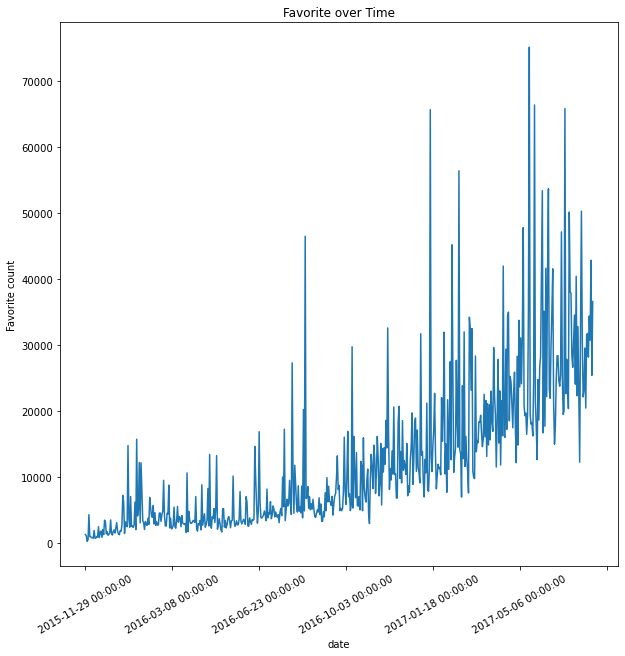

In [236]:
# Plot standardized ratings over time with ylim of 0-2
plt.figure(figsize = (10, 10))
df = wrangled_df.sort_values('date')
df.groupby('date')['favorite_count'].mean().plot(kind='line')
plt.title('Favorite over Time')
plt.xlabel('date')
plt.ylabel('Favorite count')
plt.xticks(rotation = 30)
plt.show
plt.savefig('Favorite_over_Time.png', bbox_inches='tight');

####  The average number of favorate does increase over time.